## kaggle项目：员工离职预测分析
EDA, Random forest, Clustering

In [1]:
import numpy as np
import pandas as pd

df = pd.read_csv('HR.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
satisfaction_level       14999 non-null float64
last_evaluation          14999 non-null float64
number_project           14999 non-null int64
average_montly_hours     14999 non-null int64
time_spend_company       14999 non-null int64
Work_accident            14999 non-null int64
left                     14999 non-null int64
promotion_last_5years    14999 non-null int64
sales                    14999 non-null object
salary                   14999 non-null object
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [2]:
df.rename(columns={'average_montly_hours':'average_monthly_hours', 'sales':'department','Work_accident':'work_accident'}, 
          inplace=True)
df.describe()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


### Feature analysis and visualization

In [37]:
# Department Types, Salary Classification Range
print ('Departments:')
print (df['department'].value_counts())
print ('\nSalary:')
print (df['salary'].value_counts())

Departments:
sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: department, dtype: int64

Salary:
low       7316
medium    6446
high      1237
Name: salary, dtype: int64


[Text(0,0,'sales'),
 Text(0,0,'technical'),
 Text(0,0,'support'),
 Text(0,0,'IT'),
 Text(0,0,'product_mng'),
 Text(0,0,'marketing'),
 Text(0,0,'RandD'),
 Text(0,0,'accounting'),
 Text(0,0,'hr'),
 Text(0,0,'management')]

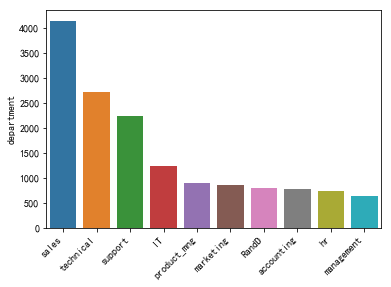

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

deptplot = sns.barplot(x = df['department'].value_counts().index, y= df['department'].value_counts())
deptplot.set_xticklabels(rotation=45, labels=df['department'].value_counts().index,horizontalalignment='right')# 设置横坐标的显示方式

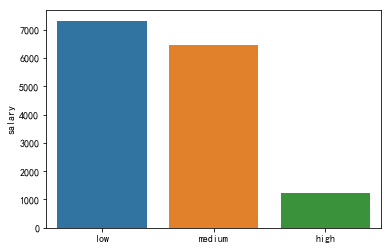

In [4]:
salaryplot = sns.barplot(x = df['salary'].value_counts().index, y= df['salary'].value_counts())

In [5]:
# correlation coefficient
df.corr()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,work_accident,left,promotion_last_5years
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064
average_monthly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433
work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245
left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000


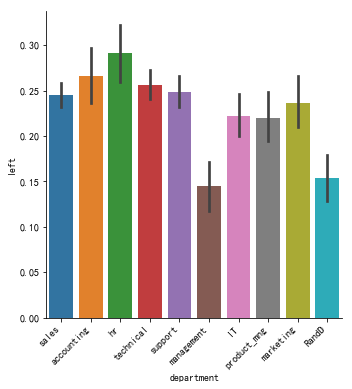

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# the relationship between left and department
dlplot = sns.catplot(x='department', y='left', kind='bar', data=df)
dlplot.set_xticklabels(rotation=45, horizontalalignment='right')

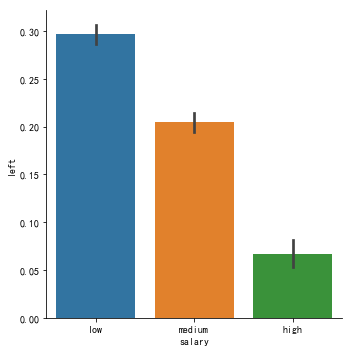

In [7]:
# salary and left
slplot = sns.catplot(x = 'salary',y = 'left',kind = 'bar',data = df)

([<matplotlib.patches.Wedge at 0x1fb7fda2710>,
 [Text(0.477272,0.991066,'medium'),
  Text(-1.07242,-0.244773,'high'),
  Text(0.685839,-0.860015,'low')])

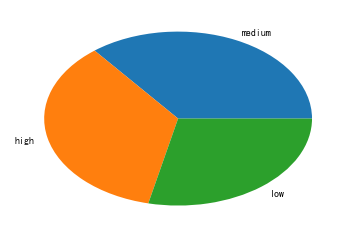

In [8]:
# the distribution of salary in different departments
count_s = df[df['department'] == 'management']['salary'].value_counts()
plt.pie(count_s,labels = count_s.index)

([<matplotlib.patches.Wedge at 0x1fb7fddf908>,
 [Text(0.0942916,1.09595,'medium'),
  Text(-0.313925,-1.05425,'low'),
  Text(1.07728,-0.222399,'high')])

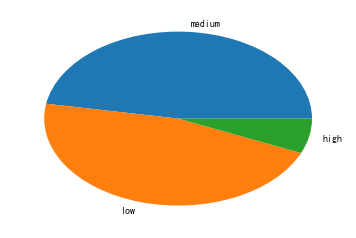

In [9]:
count_s2 = df[df['department'] == 'RandD']['salary'].value_counts()
plt.pie(count_s2,labels = count_s2.index)

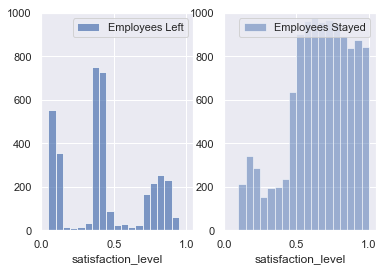

In [10]:
# satisfaction_level and left 
ls1 = df[df['left'] == 1]['satisfaction_level']
ls2 = df[df['left'] == 0]['satisfaction_level']

sns.set()
bins = np.linspace(0.0001, 1.0001, 21)
plt.subplot(1,2,1)
plt.hist(ls1, bins = bins, alpha = 0.7, label = 'Employees Left')
plt.xlabel('satisfaction_level')
plt.xlim((0,1.05))
plt.ylim((0,1000))
plt.legend(loc='best')

plt.subplot(1,2,2)
plt.hist(ls2, bins = bins, alpha = 0.5, label = 'Employees Stayed')
plt.xlabel('satisfaction_level')
plt.xlim((0,1.05))
plt.ylim((0,1000))
plt.legend(loc='best')

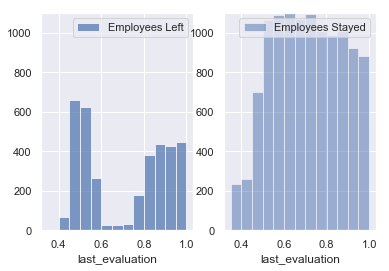

In [11]:
# last_evaluation and left
le1 = df[df['left'] == 1]['last_evaluation']
le2 = df[df['left'] == 0]['last_evaluation']

sns.set()
bins = np.linspace(0.3501, 1.0001, 14)
plt.subplot(1,2,1)
plt.hist(le1, bins = bins, alpha = 0.7, label = 'Employees Left')
plt.xlabel('last_evaluation')
plt.ylim((0,1100))
plt.legend(loc='best')

plt.subplot(1,2,2)
plt.hist(le2, bins = bins, alpha = 0.5, label = 'Employees Stayed')
plt.xlabel('last_evaluation')
plt.ylim((0,1100))
plt.legend(loc='best')

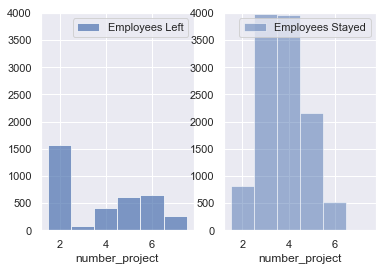

In [15]:
# number_project and left
le1 = df[df['left'] == 1]['number_project']
le2 = df[df['left'] == 0]['number_project']

sns.set()
bins = np.linspace(1.5, 7.5, 7)
plt.subplot(1,2,1)
plt.hist(le1, bins = bins, alpha = 0.7, label = 'Employees Left')
plt.xlabel('number_project')
plt.ylim((0,4000))
plt.legend(loc='best')

plt.subplot(1,2,2)
plt.hist(le2, bins = bins, alpha = 0.5, label = 'Employees Stayed')
plt.xlabel('number_project')
plt.ylim((0,4000))
plt.legend(loc='best')

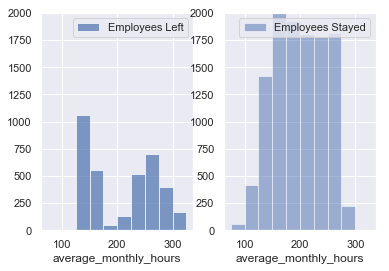

In [12]:
# average_monthly_hours and left
le1 = df[df['left'] == 1]['average_monthly_hours']
le2 = df[df['left'] == 0]['average_monthly_hours']

sns.set()
bins = np.linspace(75, 325, 11)
plt.subplot(1,2,1)
plt.hist(le1, bins = bins, alpha = 0.7, label = 'Employees Left')
plt.xlabel('average_monthly_hours')
plt.ylim((0,2000))
plt.legend(loc='best')

plt.subplot(1,2,2)
plt.hist(le2, bins = bins, alpha = 0.5, label = 'Employees Stayed')
plt.xlabel('average_monthly_hours')
plt.ylim((0,2000))
plt.legend(loc='best')

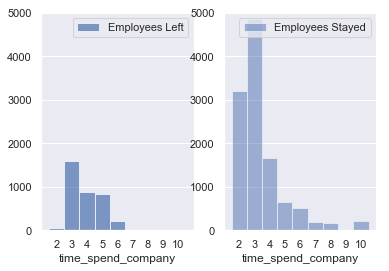

In [16]:
# time_spend_company and left
le1 = df[df['left'] == 1]['time_spend_company']
le2 = df[df['left'] == 0]['time_spend_company']

sns.set()
bins = np.linspace(1.5, 10.5, 10)
plt.subplot(1,2,1)
plt.hist(le1, bins = bins, alpha = 0.7, label = 'Employees Left')
plt.xlabel('time_spend_company')
plt.ylim((0,5000))
plt.xlim((1,11))
plt.grid(axis = 'x')
plt.xticks(np.arange(2,11))
plt.legend(loc='best')

plt.subplot(1,2,2)
plt.hist(le2, bins = bins, alpha = 0.5, label = 'Employees Stayed')
plt.xlabel('time_spend_company')
plt.ylim((0,5000))
plt.xlim((1,11))
plt.grid(axis = 'x')
plt.xticks(np.arange(2,11))
plt.legend(loc='best')

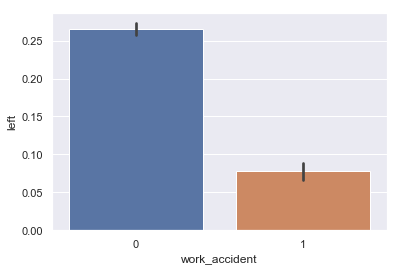

In [13]:
# work_accident and left
sns.barplot(x = 'work_accident',y = 'left',data = df)

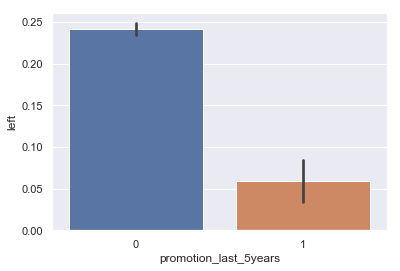

In [14]:
# promotion_last_5years and left
sns.barplot(x = 'promotion_last_5years',y = 'left',data = df)

### Feature selection

In [17]:
# split features and labels
x = df.drop('left', axis=1)
y = df['left']
x.drop(['department','salary'], axis=1, inplace=True)

# transform the object type: One-hot encoding
salary_dummy = pd.get_dummies(df['salary'],prefix = 'salary',prefix_sep = '_')
department_dummy = pd.get_dummies(df['department'],prefix = 'depart',prefix_sep = '_')
x = pd.concat([x, salary_dummy], axis=1)
x = pd.concat([x, department_dummy], axis=1)
x.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,work_accident,promotion_last_5years,salary_high,salary_low,salary_medium,depart_IT,depart_RandD,depart_accounting,depart_hr,depart_management,depart_marketing,depart_product_mng,depart_sales,depart_support,depart_technical
0,0.38,0.53,2,157,3,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0


In [18]:
# split train set and test set
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3)

In [19]:
# data preprocessing
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_scaler = scaler.fit_transform(x_train)
x_test_scaler = scaler.transform(x_test)

In [20]:
# Random Forest modeling
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit

cv = ShuffleSplit(n_splits = 20, test_size = 0.3)
rf_model = RandomForestClassifier()
rf_param = {'n_estimators': range(1,11)}
rf_grid = GridSearchCV(rf_model, rf_param, cv = cv)
rf_grid.fit(x_train, y_train)

print('Parameter with best score:')
print(rf_grid.best_params_)
print('Cross validation score:', rf_grid.best_score_)

Parameter with best score:
{'n_estimators': 9}
Cross validation score: 0.9849523809523809


In [21]:
best_rf = rf_grid.best_estimator_
print('Test score:', best_rf.score(x_test, y_test))

Test score: 0.9844444444444445


In [22]:
# feature importances
features = x.columns
feature_importances = best_rf.feature_importances_
features_df = pd.DataFrame({'Features': features, 'Importance Score': feature_importances})
features_df.sort_values('Importance Score', inplace=True, ascending=False)

features_df

,Features,Importance Score
0,satisfaction_level,0.317574
4,time_spend_company,0.175889
3,average_monthly_hours,0.165559
2,number_project,0.162551
1,last_evaluation,0.130117
5,work_accident,0.008452
8,salary_low,0.007768
7,salary_high,0.004421
19,depart_technical,0.003861
9,salary_medium,0.003808


In [23]:
# the importances of the first five features
features_df['Importance Score'][:5].sum()

0.9516903573781765

### Clustering

Text(0.5,0,'Satisfaction level')

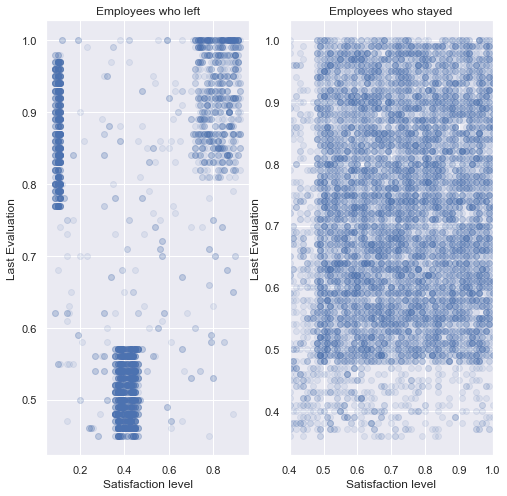

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

data = pd.read_csv('HR.csv')
data.rename(columns={'average_montly_hours':'average_monthly_hours', 'sales':'department','Work_accident':'work_accident'}, 
          inplace=True)
# explore the correlation between satisfaciton_level and last_evaluation
plt.figure(figsize = (8,8))
plt.subplot(1,2,1)
plt.plot(data.satisfaction_level[data.left == 1],data.last_evaluation[data.left == 1],'o', alpha = 0.1)
plt.ylabel('Last Evaluation')
plt.title('Employees who left')
plt.xlabel('Satisfaction level')

plt.subplot(1,2,2)
plt.title('Employees who stayed')
plt.plot(data.satisfaction_level[data.left == 0],data.last_evaluation[data.left == 0],'o', alpha = 0.1)
plt.xlim([0.4,1])
plt.ylabel('Last Evaluation')
plt.xlabel('Satisfaction level')
# suitable for clustering!

In [35]:
from sklearn.cluster import KMeans
kmeans_df =  data[data.left == 1].drop([ u'number_project',
       u'average_monthly_hours', u'time_spend_company', u'work_accident',
       u'left', u'promotion_last_5years', u'department', u'salary'],axis = 1)
kmeans = KMeans(n_clusters = 3, random_state = 0).fit(kmeans_df)
kmeans.cluster_centers_

array([[0.80851586, 0.91170931],
       [0.11115466, 0.86930085],
       [0.41014545, 0.51698182]])

C:\Users\fantasy\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


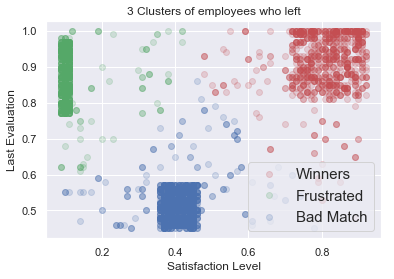

In [36]:
left = data[data.left == 1]
left['label'] = kmeans.labels_
plt.figure()
plt.xlabel('Satisfaction Level')
plt.ylabel('Last Evaluation')
plt.title('3 Clusters of employees who left')
plt.plot(left.satisfaction_level[left.label==0],left.last_evaluation[left.label==0],'o', alpha = 0.2, color = 'r')
plt.plot(left.satisfaction_level[left.label==1],left.last_evaluation[left.label==1],'o', alpha = 0.2, color = 'g')
plt.plot(left.satisfaction_level[left.label==2],left.last_evaluation[left.label==2],'o', alpha = 0.2, color = 'b')
plt.legend(['Winners','Frustrated','Bad Match'], loc = 'best', fontsize = 15,frameon=True)